___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://miro.medium.com/max/1400/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg</p>

### <font color= #2E9AFE> Tema: XGBoost - Regresión</font>

Los datos los podemos obtener de: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

Columnas disponibles:
- AT: Atmospheric Temperature in C
- V: Exhaust Vacuum Speed
- AP: Atmospheric Pressure
- RH: Relative Humidity
- PE: Power Output

Power output (energía) es la variable a predecir

In [1]:
#pip install xgboost

In [2]:
#Librerías
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#pip install openpyxl

In [4]:
#Cargar datos
datos = pd.read_excel("Folds5x2_pp.xlsx")

In [5]:
#vistazo de los datos
datos.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
#tamaño de los datos
datos.shape

(9568, 5)

In [7]:
#tipo de datos
datos.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [8]:
#valores nulos?
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


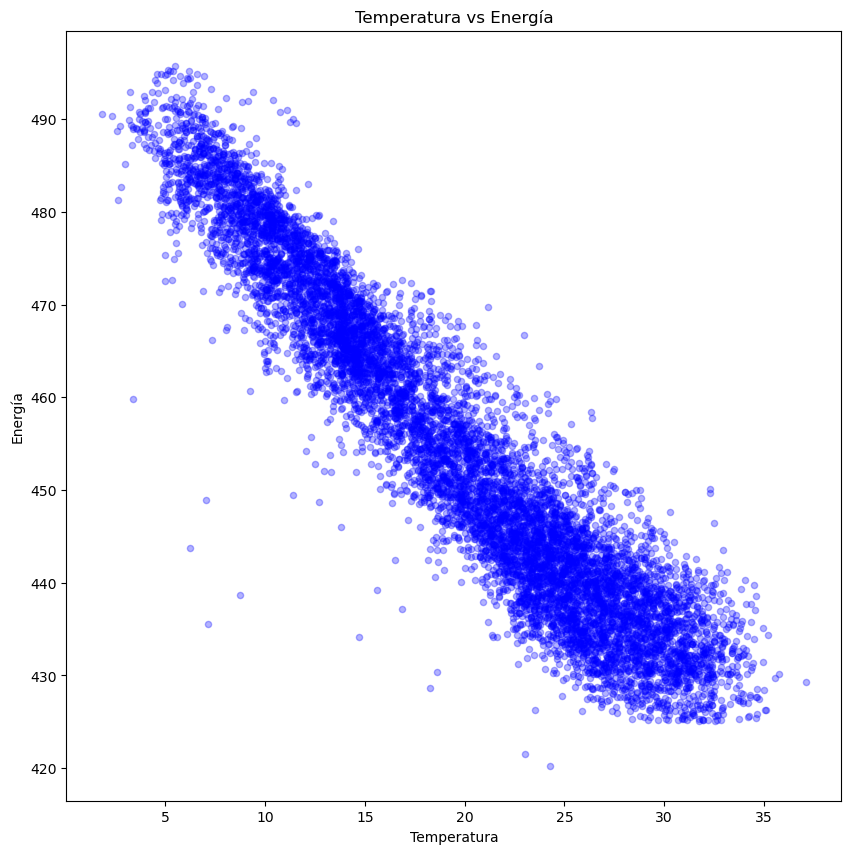

In [9]:
# Relación entre variable de salida y la temperatura
datos.plot(x ='AT', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3)
plt.title("Temperatura vs Energía")
plt.xlabel("Temperatura") 
plt.ylabel("Energía")
plt.show()

#Existe una correlación *negativa* entre la temperatura y la energía

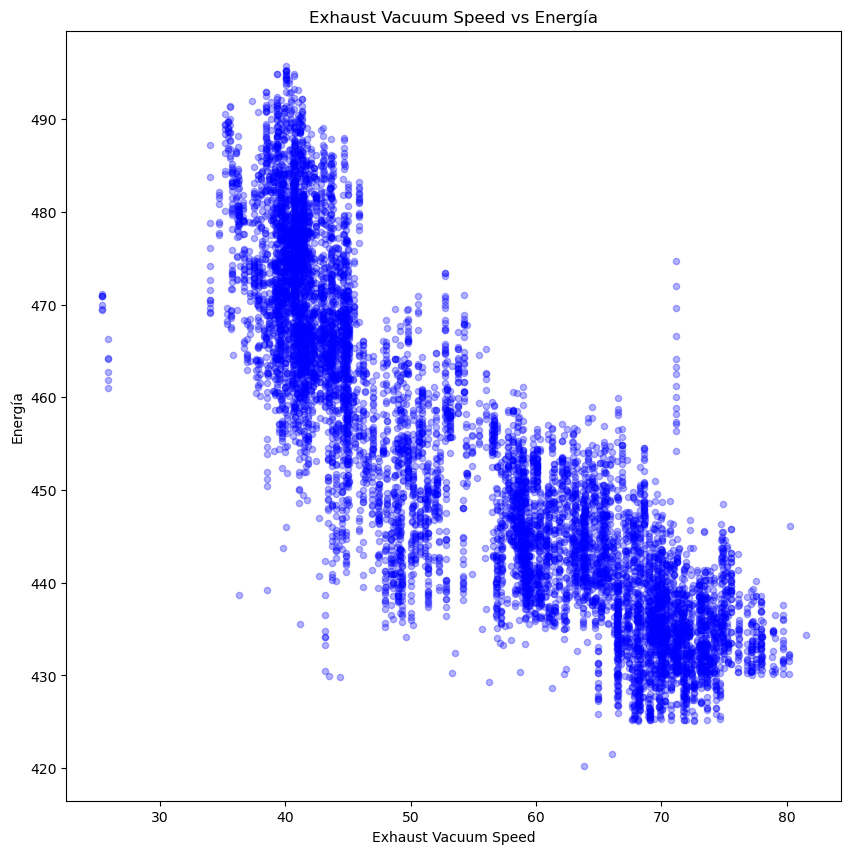

In [10]:
# Relación entre variable de salida y el Exhaust Vacuum Speed
datos.plot(x ='V', y = 'PE', kind ="scatter", 
                 figsize = [10,10],
                 color ="b", alpha = 0.3)
plt.title("Exhaust Vacuum Speed vs Energía")
plt.xlabel("Exhaust Vacuum Speed") 
plt.ylabel("Energía")
plt.show()

#Existe una correlación *negativa* entre la temperatura y el Exhaust Vacuum Speed

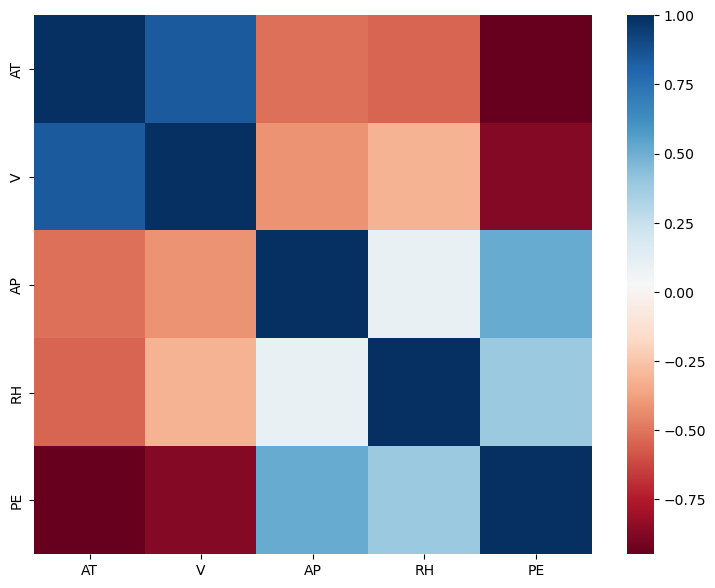

In [11]:
# gráfico de correlacion
corr = datos.corr()
plt.figure(figsize = (9, 7))
sns.heatmap(corr, cmap="RdBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [12]:
#Separar nuestras X de las Y
X = datos.drop("PE", axis = 1).values
y = datos['PE'].values
y = y.reshape(-1, 1)

#Dividiendo los datos en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size = 0.2, 
                                               random_state=42)



In [14]:
#Construir el xgboost
#inicializar objeto de regresión
modelo = xgb.XGBRegressor(objective='reg:squarederror', seed=42)
#Entrenar modelo
modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [15]:
import sklearn.metrics as metrics
y_hat= modelo.predict(X_test)

#medidas de performance
r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print('R2:',r2)
print("MSE:",mse)

R2: 0.9680627099831424
MSE: 9.263665826132463


Ahora optimizamos parámetros con grid search y utilizamos cross validation

In [16]:
#Parámetros para el grid search
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5), #porcentaje de variables a elegir cuando construyes tu arbol
     'n_estimators':[100, 200], #número de árboles a crear
     'max_depth': [10, 15, 20, 25] #profundidades
}

#Iniciar el modelo
gbm = xgb.XGBRegressor(objective='reg:squarederror', seed=42) # de nuevo, pues arriba ya se entreno

#Hacer el grid search
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
#Ajustar a los datos de entrenamiento
grid_mse.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': [10, 15, 20, 25],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [17]:
print("Mejores hiperparámetros encontrados: ",grid_mse.best_params_)

Mejores hiperparámetros encontrados:  {'colsample_bytree': 0.8, 'max_depth': 10, 'n_estimators': 200}


In [18]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modelo_nuevo = xgb.XGBRegressor(objective='reg:linear',
                            seed=42,
                           max_depth=10,
                           colsample_bytree=0.8,
                            n_estimators=200)

#Entrenar modelo
modelo_nuevo.fit(X_train, y_train)

[11:31:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [19]:
#predecir
y_hat= modelo_nuevo.predict(X_test)

#metricas de performance
r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print('R2:',r2)
print("MSE:",mse)

R2: 0.969865544207637
MSE: 8.740739372860501


**Ventajas**
- Modelo muy efectivo con bases de datos grandes y complejas
- No necesita escalamiento de variables
- Funciona bien con datos no lineales
- Modelo que muestra la importancia de las variables
- Tiene una herramienta interna para trabajar con datos nulos

**Desventajas**
- Modelo que tiende a sobreajustar (overfitting)
- Modelo de Caja negra -> no se puede interpretar
- Es más difícil tunear los hiperparámetros
- Modelo sensible a datos atípicos